The records provided to you are the grades obtained by students who had opted for the following combinations of subjects or courses and obtained a passing grade in each subject. The individual subjects in the data are: 
English, Physics, Chemistry, Mathematics, Computer Science, Biology, Physical Education, Economics, Accountancy and Business Studies.

The most dominant subject combinations, account for approximately 99% of the data are:

`
English, Physics, Chemistry, Mathematics, Computer Science    
English, Physics, Chemistry, Mathematics, Physical Education    
English, Physics, Chemistry, Mathematics, Economics    
English, Physics, Chemistry, Mathematics, Biology  
English, Economics, Accountancy, Mathematics, Business Studies  
`

The grades of students in four subjects (other than Mathematics) are provided to you. Can you predict what grade they had obtained in Mathematics?

To help you build a prediction engine, we will provide you with a training file, containing the grade points obtained by students with the above subject combinations, in all five subjects.

** Scoring **

For each of the N records in the input file, we will compute:

`p = abs(Predicted Grade Point in Mathematics - Actual Grade Point in Mathematics)`

Where 'abs' indicates the Absolute Value or Magnitude. If p = 0 or 1 your answer for that particular student record will be considered correct. i.e, we allow a tolerance of one grade point away from the correct answer, to take into consideration the marginal errors which might occur during the testing or grading process.

`Score = 100 * ((C-W)/N) `

Where C = Number of Correct predictions, not more than one grade point away from the actual grade point assigned. 

W = Number of wrong (incorrect) predictions and 

N = Total number of records in the input.

In [12]:
import json

In [4]:
t = """{"Physics":8,"Chemistry":7,"PhysicalEducation":3,"English":4,"Mathematics":6,"serial":195490}"""
json.loads(t)

{'Chemistry': 7,
 'English': 4,
 'Mathematics': 6,
 'PhysicalEducation': 3,
 'Physics': 8,
 'serial': 195490}

Let's create a separate model for each combination of subject. Because we know that 99% of test just belongs to 5 combinations, we can focus on these four combinations only. For all the other case, we can just produce an average score of that person.

In [129]:
combinations_text = ['English, Physics, Chemistry, ComputerScience, Mathematics',
'English, Physics, Chemistry, PhysicalEducation, Mathematics',
'English, Physics, Chemistry, Economics, Mathematics',
'English, Physics, Chemistry, Biology, Mathematics',  
'English, Economics, Accountancy, BusinessStudies, Mathematics']
combinations = [c.split(', ') for c in combinations_text]

In [36]:
combinations

[['English', 'Physics', 'Chemistry', 'ComputerScience', 'Mathematics'],
 ['English', 'Physics', 'Chemistry', 'PhysicalEducation', 'Mathematics'],
 ['English', 'Physics', 'Chemistry', 'Economics', 'Mathematics'],
 ['English', 'Physics', 'Chemistry', 'Biology', 'Mathematics'],
 ['English', 'Economics', 'Accountancy', 'BusinessStudies', 'Mathematics']]

In [114]:
def check_data_has_combination(data, combination):
    for subject in combination:
        if subject not in data:
            return False
    return True

def check_data_has_combination_test(data, combination):
    for subject in combination:
        if subject != 'Mathematics' and subject not in data:
            return False
    return True

def get_data_from_combination(data, combination):
    d = []
    for subject in combination:
        if subject in data:
            d.append(data[subject])
    return d

In [11]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
from sklearn.linear_model import LinearRegression

In [56]:
regressors = []
# 5 trees for 5 combinations 
for i in range(5):
#     regressors.append(DecisionTreeRegressor(criterion = 'mae', max_depth = 10))
    regressors.append(LinearRegression())

In [66]:
TRAINING = 'training.json'
TEST_INPUT = 'sample-test.in.json'
TEST_OUTPUT = 'sample-test.out.json'

# Training data
X_s = [[] for _ in range(5)]
Y_s = [[] for _ in range(5)]


# Load training data
with open(TRAINING, 'r') as fh:
    lines = fh.readlines()
    
    for line in lines[1:]:
        d = json.loads(line)
        
        for i, combination in enumerate(combinations):
            if check_data_has_combination(d, combination):
                sample = get_data_from_combination(d, combination)
                X_s[i].append(sample[:4])
                Y_s[i].append(sample[4])
                break

X_s = [np.array(X_s[i]) for i in range(5)]
Y_s = [np.array(Y_s[i]) for i in range(5)]

In [84]:
# Fit 5 regressor
import numpy as np
for i in range(5):
    regressors[i].fit( X_s[i],  Y_s[i] )

In [139]:
k = 20
for i in range(5):
    print ('Wrong answers for combination ' + combinations_text[i])
    results = regressors[i].score(X_s[i][:], Y_s[i])
    predicted = [int(t) for t in regressors[i].predict(X_s[i][:k])]
    correct = [t for t in Y_s[i][:k]]
    
    for j in range(k):
        if abs(correct[j] - predicted[j]) > 1:
            print ('Score of the first four subjects = %s, predict Math score = %d, correct = %d' % (str(X_s[i][j]), predicted[j], correct[j]))

Wrong answers for combination English, Physics, Chemistry, ComputerScience, Mathematics
Score of the first four subjects = [3 5 6 5], predict Math score = 5, correct = 7
Score of the first four subjects = [1 4 4 3], predict Math score = 3, correct = 7
Score of the first four subjects = [2 5 4 4], predict Math score = 4, correct = 2
Score of the first four subjects = [5 5 5 7], predict Math score = 5, correct = 3
Score of the first four subjects = [1 4 2 3], predict Math score = 3, correct = 1
Score of the first four subjects = [2 5 7 6], predict Math score = 5, correct = 7
Score of the first four subjects = [2 2 2 4], predict Math score = 2, correct = 4
Score of the first four subjects = [4 5 7 6], predict Math score = 6, correct = 3
Wrong answers for combination English, Physics, Chemistry, PhysicalEducation, Mathematics
Score of the first four subjects = [3 1 1 1], predict Math score = 1, correct = 3
Score of the first four subjects = [5 3 4 5], predict Math score = 3, correct = 8
Sc

Note for this case: 

`
Input = [3 1 1 1]
Predict = 1
Correct = 3 
`

We should never predict a score to be at the two extremes, because we would always achieve better result, by predicting one score away from them. 

Let's break down this linear regressor

In [140]:
for i in range(5):
    print (regressors[i].coef_)

[ 0.07117858  0.35324092  0.33661138  0.22137701]
[ 0.06556114  0.42409517  0.40598503  0.04620729]
[ 0.14184456  0.32692396  0.23998285  0.29455252]
[-0.09311078  0.31139386  0.46135802  0.12705874]
[ 0.15533857  0.3530527   0.52918029  0.16509402]


You can see that most of the time, English score doesn't contribute much to one's Math score. In one of the combinations (English, Physics, Chemistry, Biology, Mathematics), it even has a ***negative*** contribution to Math score. This result is quite logical to me, because as a high school student, I did pretty well in all natural science subjects, but having no time to study English, I didn't get very high score in this subject.

Physics, Chemistry and Accountancy are three subjects that correlate well with Math's score.

In [161]:
test_data = []

with open(TEST_INPUT, 'r') as fh:
    lines = fh.readlines()
    for line in lines[1:]:
        d = json.loads(line)
        
        test_data.append(d)
        
test_labels = []
with open(TEST_OUTPUT, 'r') as fh:
    lines = fh.readlines()

    for line in lines:
        d = int(line.strip())

        test_labels.append(d)

In [165]:
def evaluate(r, test_data, test_labels):
    predicted = []
    origin_predicted = []
    
    for d in test_data:
        for i, combination in enumerate(combinations):
            if check_data_has_combination_test(d, combination):
                sample_X = get_data_from_combination(d, combination)
                y = int(r[i].predict([sample_X])[0])
                origin_predicted.append(y)
                if y == 1:
                    y = 2
                if y >= 8 :
                    y = 7
                predicted.append(y)
                break
        else:
            # Just average it
            sum = 0
            for subject in d:
                if subject != 'serial':
                    sum += d[subject]
            predicted.append(sum // 4)
    
    C = 0
    W = 0
    for predicted_y, y in zip(predicted, test_labels):
        if abs(y - predicted_y) <= 1:
            C += 1
        else:
            W += 1
    print ( (C - W) * 100 / (C + W) )
    
    return origin_predicted

In [166]:
origin_predicted = evaluate(regressors, test_data, test_labels)

36.52524090320725


** On Hackkerank **

Linear regression approach receive a score of 37.68
(32 is passing score).

At this point, I recognize that we didn't use the following piece of information:

`
The student is first assessed on a scale of 100. (S)He needs a score of at least 33% to pass in the subject. Among those who pass:

Grade 1 is assigned to the top one-eighth of students who pass the course.  
Grade 2 is assigned to the next one-eighth of students who pass the course.  
.....
Grade 8 is assigned to the last one-eighth of students who pass the course.  
If more than 1 student share the same score and lie in the margin, they share the higher grade.
`

Is there any a good way to incorporate this information into our estimation?

Firstly, let's draw a histogram of our prediction.

In [148]:
%matplotlib inline
import pylab as plt

(array([  8219.,  13350.,  12339.,  11298.,   9755.,   8622.,   4663.,
           409.,    152.]),
 array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 9 Patch objects>)

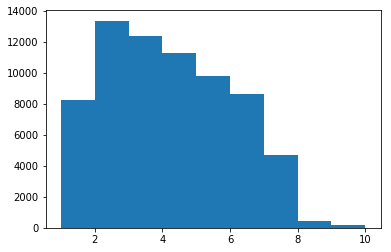

In [157]:
plt.hist(origin_predicted,  9 )

Our predictor is quite biased, giving nearly 14000 people rank 2, and only 4600 people get rank 7, and 400 get rank 8, some even get rank 9, which is an invalid rank. What if instead of using directly the predicted score for finally score, we rerank these predicted score, and produce scores evenly into bins.

In [170]:
def evaluate_2(r, test_data, test_labels):
    origin_predicted = []
    
    for test_index, d in enumerate(test_data):
        for i, combination in enumerate(combinations):
            if check_data_has_combination_test(d, combination):
                sample_X = get_data_from_combination(d, combination)
                y = r[i].predict([sample_X])[0]
                origin_predicted.append( (test_index, y) )
                break
        else:
            # Just average it
            sum = 0
            for subject in d:
                if subject != 'serial':
                    sum += d[subject]
            origin_predicted.append((test_index, sum // 4))
    
    sorted_origin_predicted = sorted(origin_predicted, key = lambda t : t[1])
    
    # Rescale origin_predicted into predicted
    predicted = np.zeros(len(test_data))
    
    for i, d in enumerate(sorted_origin_predicted):
        test_index, _ = d
        y = (i * 8) // len(sorted_origin_predicted) + 1
        
        if y == 1:
            y = 2
        if y == 8 :
            y = 7
            
        predicted[test_index] = y
    
    C = 0
    W = 0
    for predicted_y, y in zip(predicted, test_labels):
        if abs(y - predicted_y) <= 1:
            C += 1
        else:
            W += 1
    print ( (C - W) * 100 / (C + W) )
    
    return predicted

In [171]:
predicted = evaluate_2(regressors, test_data, test_labels)

43.353947936142674


(array([ 17383.,   8691.,   8691.,   8692.,   8691.,  17382.]),
 array([ 2.        ,  2.83333333,  3.66666667,  4.5       ,  5.33333333,
         6.16666667,  7.        ]),
 <a list of 6 Patch objects>)

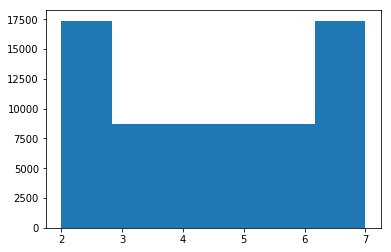

In [175]:
plt.hist(predicted,  6 )

Now you have a nice score distribution for Math, note that we lump together rank 1 and 2, and together rank 7 and 8.

Running this on Hackerank give us a score of 42.97

Following is the full code for a score of 42.97

In [125]:
import json
import numpy as np

combinations = ['English, Physics, Chemistry, ComputerScience, Mathematics',
'English, Physics, Chemistry, PhysicalEducation, Mathematics',
'English, Physics, Chemistry, Economics, Mathematics',
'English, Physics, Chemistry, Biology, Mathematics',  
'English, Economics, Accountancy, BusinessStudies, Mathematics']

combinations = [c.split(', ') for c in combinations]

def check_data_has_combination(data, combination):
    for subject in combination:
        if subject not in data:
            return False
    return True

def check_data_has_combination_test(data, combination):
    for subject in combination:
        if subject != 'Mathematics' and subject not in data:
            return False
    return True

def get_data_from_combination(data, combination):
    d = []
    for subject in combination:
        if subject in data:
            d.append(data[subject])
    return d

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

regressors = []
# 5 trees for 5 combinations 
for i in range(5):
    #regressors.append(DecisionTreeRegressor(criterion = 'mae', max_depth = 10))
    regressors.append(LinearRegression())
    
TRAINING = 'training.json'

# Training data
X_s = [[] for _ in range(5)]
Y_s = [[] for _ in range(5)]

# Load training data
with open(TRAINING, 'r') as fh:
    lines = fh.readlines()
    
    for line in lines[1:]:
        d = json.loads(line)
        
        for i, combination in enumerate(combinations):
            if check_data_has_combination(d, combination):
                sample = get_data_from_combination(d, combination)
                X_s[i].append(sample[:4])
                Y_s[i].append(sample[4])
                break

X_s = [np.array(X_s[i]) for i in range(5)]
Y_s = [np.array(Y_s[i]) for i in range(5)]

for i in range(5):
    regressors[i].fit(X_s[i], Y_s[i])
    
    
# Testing over the input data
import sys
lines = sys.stdin.readlines()

origin_predicted = []

no_of_test = len(lines[1:])

for test_index, line in enumerate(lines[1:]):
    d = json.loads(line)

    for i, combination in enumerate(combinations):
        if check_data_has_combination_test(d, combination):
            sample_X = get_data_from_combination(d, combination)
            y = regressors[i].predict([sample_X])[0]
            origin_predicted.append( (test_index, y) )
            break
    else:
        # Just average it
        sum = 0
        for subject in d:
            if subject != 'serial':
                sum += d[subject]
        origin_predicted.append( (test_index, sum // 4) )

sorted_origin_predicted = sorted(origin_predicted, key = lambda t : t[1])
predicted = np.zeros(no_of_test)

for i, d in enumerate(sorted_origin_predicted):
    test_index, _ = d
    y = (i * 8) // len(sorted_origin_predicted) + 1

    if y == 1:
        y = 2
    if y == 8 :
        y = 7
    
    predicted[test_index] = y

for i in range(no_of_test):
    print (int(predicted[i]))